# Top 10 Countries in the Guardian world news

Based on the metadata.csv, our group aims to do further exploration about the world news section in the Guardian. We explored top 10 countries that are frequently mentioned in the world news in 2022, and try to find which country the Guardian focused most on the world news.The final result shows that in 2022, the Guardian focuses on Urkaine and Russia way more than other countries, which shows the great influence of Urkaine - Russia War.

Note: I pip install geotext in my anaconda shell prompt because geotext can extract country and city mentions from text.

Free software: MIT license

Documentation: https://geotext.readthedocs.org.

Analyzed by: Sun Wengyi

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from geotext import GeoText

#Use geotext to recognize countries from text
def extract_countries(text):
    places = GeoText(text)
    return places.countries

def main(csv_file):
    #Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    #Initialize a counter
    country_counts = Counter()
    #Iterate over each row of the DataFrame
    for text in df['Text']: 
        #Recognize and count countries
        country_counts.update(extract_countries(text))
    #Get the top 10 countries by frequency
    top_countries = country_counts.most_common(10)
    #Prepare the country names and their corresponding count values separately
    names, values = zip(*top_countries)

    #Plot a bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(names, values)
    plt.bar(names, values)
    plt.title('Top 10 Most Frequent Countries in Dataset')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    #Display the count on each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + .005, int(yval), va='bottom')
    
    plt.show()

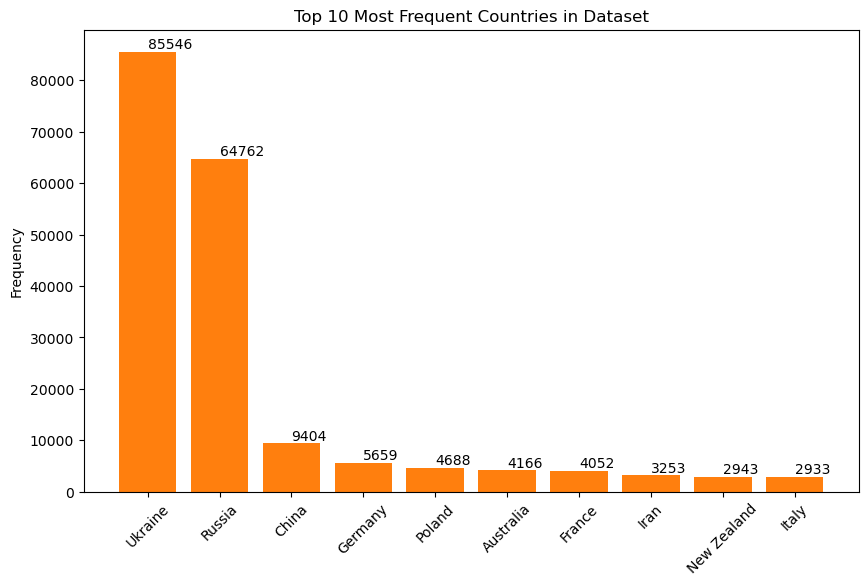

In [16]:
#Calling main function and passing the file path
main(r'C:/Users/idaid/Desktop/group project/the guardian/metadata.csv')